# Steven Granaturov Assignment Week 4 #

Using all features:

| Kernel            | linear |  rbf   | poly   |sigmoid |
|-------------------|--------|--------|--------|--------|
| Train Score       |  100%  |  100%  |99.976% |99.219% |
| Test Score        |99.858% |99.905% |99.858% |99.290% |

Using features (service, count):

| Kernel            | linear  |  rbf   |
|-------------------|---------|--------|
| Train Score       |75.331%  |96.913% |
| Test Score        |77.152 % |97.398% |

Because the data isn't linearly seperable, the linear kernel scored much worse than the rbf. The decision boundary is much more complex and the RBF kernel captured more intricate relationship between the 2 features.

- Linear kernel:
    - Simple and efficient
    - May struggle with complex, non-linear patterns
- RBF
    - Can capture complex and non-linear relationships
    - Sensitive to hyperparameters. Finding a gamma value can be challenging and an improper value may lead to overfitting.
- Polynomial
    - Can model non-linear relationships, and the degree of the polynomial can easily be adjusted.
    - Higher polynomial degrees typically lead to overfitting. They are also computationally expensive.
- Sigmoid
    - Useful when dealing with data that has a sigmoid-like shape.
    - Sigmoid kernels are not commonly used such as the other ones.

## SVM - All features ##

#### Imports ####

In [43]:
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv("kddcup99.csv")


#### Labeling Dos & Non-dos attacks, Removing entries with a 'normal' label. ####

In [44]:
def map_label(label):
    if label in ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop']:
        return 1
    else:
        return 0
    
df['labelBinary'] = df['label'].apply(map_label)

df.drop(df[df['label'] == "normal"].index, inplace=True)

df = df.drop('label', axis = 1)

df2 = df.copy()

print(df['count'])

744        1
745        1
4049       1
4113       1
7601       6
          ..
490959    29
490960    30
490961    31
490962    32
490963    33
Name: count, Length: 396743, dtype: int64


#### Encoding columns with strings to integers ####

In [45]:
df_reset = df.reset_index(drop=True)

vals1, df_reset['protocol_type'] = np.unique(df['protocol_type'].values, return_inverse=True)
vals2, df_reset['service'] = np.unique(df['service'].values, return_inverse=True)
vals3, df_reset['flag'] = np.unique(df['flag'].values, return_inverse=True)

#### Defining X and y, Undersampling the data ####

In [46]:
X = df_reset.iloc[: , :41]
y = df_reset.iloc[: , 41:]

from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

print(len(X_resampled))

10570


#### Splitting the data, 80% train, 20% test ####

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 1)

#### Scaling data ####

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

#### Creation of SVM - Linear kernel ####

In [49]:
from sklearn import svm

svc = svm.SVC(kernel='linear', C=100, gamma=.0073)

svc.fit(X_scaled_train, y_train)

c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, gamma=0.0073, kernel='linear')

#### Fitting the model & accuracy scores ####

In [50]:
from sklearn.metrics import accuracy_score

y_train_pred = svc.predict(X_scaled_train)
y_test_pred = svc.predict(X_scaled_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  1.0
Test score:  0.9985808893093662


#### Creation of SVM - rbf kernel ####

In [51]:
svc = svm.SVC(kernel='rbf', C=100, gamma=.0073)

svc.fit(X_scaled_train, y_train)

c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, gamma=0.0073)

#### Fitting the model & accuracy scores ####

In [52]:
y_train_pred = svc.predict(X_scaled_train)
y_test_pred = svc.predict(X_scaled_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  1.0
Test score:  0.9990539262062441


#### Creation of SVM - poly kernel ####

In [53]:
svc = svm.SVC(kernel='poly', C=100, gamma=.0073)

svc.fit(X_scaled_train, y_train)

c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, gamma=0.0073, kernel='poly')

#### Fitting the model & accuracy scores ####

In [54]:
y_train_pred = svc.predict(X_scaled_train)
y_test_pred = svc.predict(X_scaled_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.999763481551561
Test score:  0.9985808893093662


#### Creation of SVM - sigmoid kernel ####

In [55]:
svc = svm.SVC(kernel='sigmoid', C=100, gamma=.0073)

svc.fit(X_scaled_train, y_train)

c:\Users\steve\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=100, gamma=0.0073, kernel='sigmoid')

#### Fitting the model & accuracy scores ####

In [56]:
y_train_pred = svc.predict(X_scaled_train)
y_test_pred = svc.predict(X_scaled_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.9921948912015137
Test score:  0.9929044465468306


## SVM - 2 Features ##

#### Creation of X (service, count), y ####

In [57]:
X = pd.DataFrame()

vals2, X['service'] = np.unique(df['service'].values, return_inverse=True)

X['count'] = df['count'].reset_index(drop=True)

y = df2['labelBinary']

print(X)

        service  count
0            54      1
1            54      1
2            54      1
3            54      1
4            54      6
...         ...    ...
396738       44     29
396739       44     30
396740       44     31
396741       44     32
396742       44     33

[396743 rows x 2 columns]


#### Undersample the data ####

In [58]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

print(len(X_resampled))

10570


#### Split data, 80% train, 20% test ####

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 1)

#### Scale the data ####

In [60]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.fit_transform(X_test)

#### Creation of SVM - Linear kernel ####

In [61]:
svc = svm.SVC(kernel='linear', C=100, gamma=.0073)

svc.fit(X_scaled_train, y_train)

SVC(C=100, gamma=0.0073, kernel='linear')

#### Fitting the model & accuracy scores ####

In [62]:
y_train_pred = svc.predict(X_scaled_train)
y_test_pred = svc.predict(X_scaled_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.7533112582781457
Test score:  0.7715231788079471


#### Plotting decision boundary ####

C:\Users\steve\AppData\Local\Temp\ipykernel_6256\7284371.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter1 = plt.scatter([], [], c='red', label='Dos', cmap=plt.cm.RdBu)
C:\Users\steve\AppData\Local\Temp\ipykernel_6256\7284371.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter2 = plt.scatter([], [], c='blue', label='Non Dos', cmap=plt.cm.RdBu)


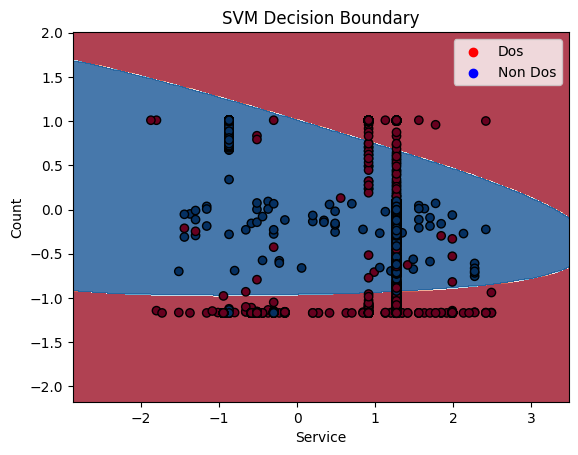

In [73]:
import matplotlib.pyplot as plt
# Define a meshgrid of points to plot the decision boundary
x_min, x_max = X_scaled_train[:, 0].min() - 1, X_scaled_train[:, 0].max() + 1
y_min, y_max = X_scaled_train[:, 1].min() - 1, X_scaled_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
scatter1 = plt.scatter([], [], c='red', label='Dos', cmap=plt.cm.RdBu)
scatter2 = plt.scatter([], [], c='blue', label='Non Dos', cmap=plt.cm.RdBu)
plt.legend(handles=[scatter1, scatter2], loc='upper right')

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

# Plot the data points
plt.scatter(X_scaled_train[:, 0], X_scaled_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='k')

plt.xlabel('Service')
plt.ylabel('Count')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()

#### Creation of SVM - rbf kernel ####

In [74]:
svc = svm.SVC(kernel='rbf', C=100, gamma=.0073)

svc.fit(X_scaled_train, y_train)

SVC(C=100, gamma=0.0073)

#### Fitting the model & accuracy scores ####

In [75]:
y_train_pred = svc.predict(X_scaled_train)
y_test_pred = svc.predict(X_scaled_test)

train_score = accuracy_score(y_train, y_train_pred)
test_score = accuracy_score(y_test, y_test_pred)

print("Train score: ", train_score)
print("Test score: ", test_score)

Train score:  0.9691343424787133
Test score:  0.9739829706717124


#### Plotting decision boundary ####

C:\Users\steve\AppData\Local\Temp\ipykernel_6256\2700652508.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter1 = plt.scatter([], [], c='red', label='Dos', cmap=plt.cm.RdBu)
C:\Users\steve\AppData\Local\Temp\ipykernel_6256\2700652508.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter2 = plt.scatter([], [], c='blue', label='Non Dos', cmap=plt.cm.RdBu)


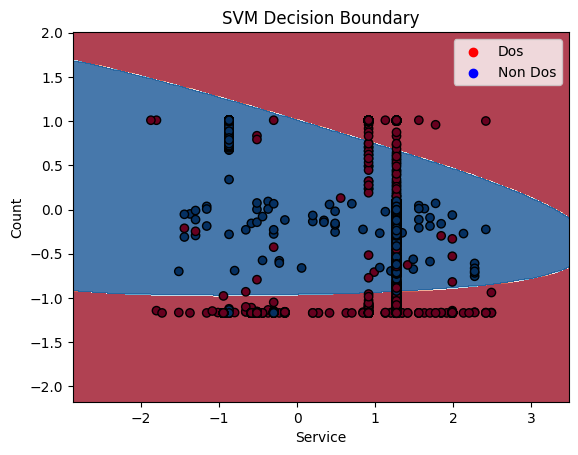

In [76]:
x_min, x_max = X_scaled_train[:, 0].min() - 1, X_scaled_train[:, 0].max() + 1
y_min, y_max = X_scaled_train[:, 1].min() - 1, X_scaled_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
scatter1 = plt.scatter([], [], c='red', label='Dos', cmap=plt.cm.RdBu)
scatter2 = plt.scatter([], [], c='blue', label='Non Dos', cmap=plt.cm.RdBu)
plt.legend(handles=[scatter1, scatter2], loc='upper right')

plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)

# Plot the data points
plt.scatter(X_scaled_train[:, 0], X_scaled_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='k')

plt.xlabel('Service')
plt.ylabel('Count')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()